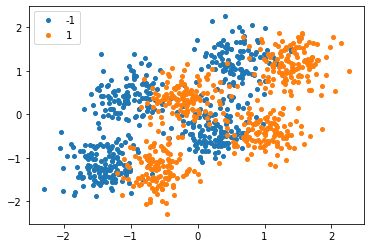

In [51]:
import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid


train_mat = spio.loadmat('dados_treinamento.mat')

X_train = train_mat['X']
y_train = train_mat['y']

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=8, label=name)
ax.legend(numpoints=1, loc='upper left')

plt.show()

In [28]:
%matplotlib inline

import tensorflow as tf
import scipy.io as spio
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


train_mat = spio.loadmat('dados_treinamento.mat')

x_train = train_mat['X']
y_train = train_mat['y']

# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

# Separate a validation set
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.3, random_state=0)


test_mat = spio.loadmat('dados_val.mat')
x_test = test_mat['Xval']
y_test = test_mat['yval']
y_test = encoder.transform(y_test)

testes_neuronios=[]
# for k in range(200,201,10):
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, kernel_initializer='normal', activation='relu'), #relu, linear, sigmoid
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid')
])

model.compile(loss='binary_crossentropy', #binary_crossentropy, mean_absolute_error, 
              optimizer='adam', # sgd, rmsprop, adagrad, adadelta, adam 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)
loss, accuracy = model.evaluate(x_val, y_val)
# testes_neuronios.append({'n':k, 'loss':loss, 'accuracy':accuracy})
# print(testes_neuronios)

Train on 700 samples, validate on 300 samples
Epoch 1/200
700/700 [==============================] - 1s 831us/sample - loss: 0.6784 - acc: 0.5871 - val_loss: 0.6696 - val_acc: 0.5300
Epoch 2/200
700/700 [==============================] - 0s 81us/sample - loss: 0.6508 - acc: 0.5843 - val_loss: 0.6487 - val_acc: 0.5300
Epoch 3/200
700/700 [==============================] - 0s 67us/sample - loss: 0.6229 - acc: 0.5829 - val_loss: 0.6295 - val_acc: 0.5333
Epoch 4/200
700/700 [==============================] - 0s 71us/sample - loss: 0.5963 - acc: 0.5843 - val_loss: 0.6112 - val_acc: 0.5567
Epoch 5/200
700/700 [==============================] - 0s 67us/sample - loss: 0.5758 - acc: 0.6214 - val_loss: 0.5980 - val_acc: 0.5867
Epoch 6/200
700/700 [==============================] - 0s 72us/sample - loss: 0.5610 - acc: 0.6314 - val_loss: 0.5897 - val_acc: 0.6200
Epoch 7/200
700/700 [==============================] - 0s 88us/sample - loss: 0.5515 - acc: 0.6514 - val_loss: 0.5842 - val_acc: 0.6300
E

700/700 [==============================] - 0s 63us/sample - loss: 0.3142 - acc: 0.8743 - val_loss: 0.3601 - val_acc: 0.8633
Epoch 61/200
700/700 [==============================] - 0s 78us/sample - loss: 0.3127 - acc: 0.8729 - val_loss: 0.3606 - val_acc: 0.8633
Epoch 62/200
700/700 [==============================] - 0s 74us/sample - loss: 0.3110 - acc: 0.8757 - val_loss: 0.3604 - val_acc: 0.8600
Epoch 63/200
700/700 [==============================] - 0s 65us/sample - loss: 0.3098 - acc: 0.8800 - val_loss: 0.3557 - val_acc: 0.8633
Epoch 64/200
700/700 [==============================] - 0s 64us/sample - loss: 0.3070 - acc: 0.8786 - val_loss: 0.3539 - val_acc: 0.8600
Epoch 65/200
700/700 [==============================] - 0s 65us/sample - loss: 0.3054 - acc: 0.8757 - val_loss: 0.3579 - val_acc: 0.8600
Epoch 66/200
700/700 [==============================] - 0s 68us/sample - loss: 0.3041 - acc: 0.8786 - val_loss: 0.3559 - val_acc: 0.8633
Epoch 67/200
700/700 [==============================] 

Epoch 120/200
700/700 [==============================] - 0s 75us/sample - loss: 0.2759 - acc: 0.8886 - val_loss: 0.3480 - val_acc: 0.8600
Epoch 121/200
700/700 [==============================] - 0s 55us/sample - loss: 0.2782 - acc: 0.8857 - val_loss: 0.3471 - val_acc: 0.8600
Epoch 122/200
700/700 [==============================] - 0s 66us/sample - loss: 0.2761 - acc: 0.8871 - val_loss: 0.3567 - val_acc: 0.8567
Epoch 123/200
700/700 [==============================] - 0s 63us/sample - loss: 0.2755 - acc: 0.8843 - val_loss: 0.3473 - val_acc: 0.8600
Epoch 124/200
700/700 [==============================] - 0s 66us/sample - loss: 0.2762 - acc: 0.8829 - val_loss: 0.3440 - val_acc: 0.8600
Epoch 125/200
700/700 [==============================] - 0s 64us/sample - loss: 0.2751 - acc: 0.8829 - val_loss: 0.3447 - val_acc: 0.8600
Epoch 126/200
700/700 [==============================] - 0s 60us/sample - loss: 0.2767 - acc: 0.8857 - val_loss: 0.3467 - val_acc: 0.8600
Epoch 127/200
700/700 [===========

700/700 [==============================] - 0s 74us/sample - loss: 0.2702 - acc: 0.8857 - val_loss: 0.3539 - val_acc: 0.8600
Epoch 180/200
700/700 [==============================] - 0s 66us/sample - loss: 0.2685 - acc: 0.8871 - val_loss: 0.3457 - val_acc: 0.8567
Epoch 181/200
700/700 [==============================] - 0s 62us/sample - loss: 0.2717 - acc: 0.8900 - val_loss: 0.3486 - val_acc: 0.8600
Epoch 182/200
700/700 [==============================] - 0s 58us/sample - loss: 0.2701 - acc: 0.8886 - val_loss: 0.3546 - val_acc: 0.8600
Epoch 183/200
700/700 [==============================] - 0s 68us/sample - loss: 0.2694 - acc: 0.8871 - val_loss: 0.3518 - val_acc: 0.8567
Epoch 184/200
700/700 [==============================] - 0s 65us/sample - loss: 0.2701 - acc: 0.8843 - val_loss: 0.3534 - val_acc: 0.8567
Epoch 185/200
700/700 [==============================] - 0s 68us/sample - loss: 0.2690 - acc: 0.8900 - val_loss: 0.3488 - val_acc: 0.8633
Epoch 186/200
700/700 [=========================

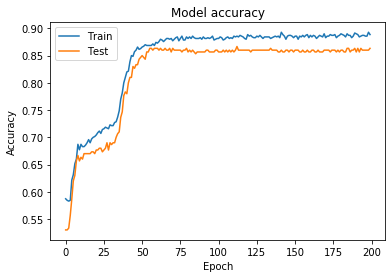

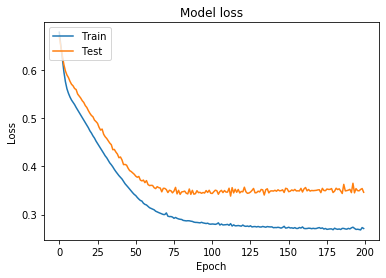

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [26]:
l = []
for n in range(5,20,2):
    print(n)
    l.append({'n':n, 'n_2':n^2})
print(l)

# import pickle
# with open('results_sigmoid.pkl','wb') as f:
#     pickle.dump([testes_neuronios],f)

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# decision = lambda x: -1 if x<0 else 1
# pred = np.array([decision(x) for x in model.predict(x_train)])
pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test, pred))

5
7
9
11
13
15
17
19
[{'n': 5, 'n_2': 7}, {'n': 7, 'n_2': 5}, {'n': 9, 'n_2': 11}, {'n': 11, 'n_2': 9}, {'n': 13, 'n_2': 15}, {'n': 15, 'n_2': 13}, {'n': 17, 'n_2': 19}, {'n': 19, 'n_2': 17}]
[[405  76]
 [ 65 454]]
0.859


* Plotar as regiões de decisão
    * https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly 
* early stopping: https://www.tensorflow.org/tutorials/keras/basic_regression?hl=pt_BR#train_the_model
#### a) 
* plote curva de evolução do valor
* aplicar holdout
* explicar escolhas de parâmetros
* plotar evolução do custo em relação ao conjunto de validação
* plotar conjunto de validação/conjunto de treinamento
    * separar conjunto de validação/treinamento antes
#### b) 
* plotar região de decisão

#### c)
* 
#### d)
#### e)
#### f)
#### g)

#### b)



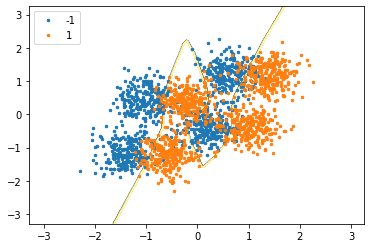

In [64]:
# -*- coding: utf-8 -*-

import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid

train_mat = spio.loadmat('dados_treinamento.mat')
test_mat = spio.loadmat('dados_val.mat')

X_train = np.concatenate((train_mat['X'], test_mat['Xval']))
y_train = np.concatenate((train_mat['y'], test_mat['yval']))

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', markersize=5, linestyle='', label=name)
ax.legend(numpoints=1, loc='upper left')

# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
fig = plt.show()

#### c)

#### d)

#### e)

In [84]:
%matplotlib inline

import scipy.io as spio
from sklearn.preprocessing import Binarizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


train_mat = spio.loadmat('dados_treinamento.mat')

x_train = train_mat['X']
y_train = train_mat['y']

from sklearn.svm import SVC
clf = SVC(gamma='auto')

clf.fit(x_train, y_train)

pred = clf.predict(x_train)
cm = confusion_matrix(y_train, pred)
print(cm)
print(accuracy_score(y_train, pred))


[[437  73]
 [ 59 431]]
0.868


/home/intelie/anaconda3/envs/Tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


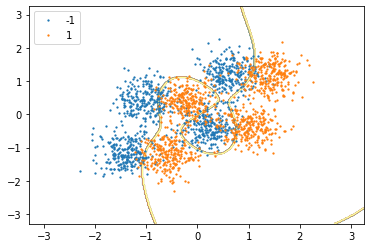

In [86]:
# -*- coding: utf-8 -*-

import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid

train_mat = spio.loadmat('dados_treinamento.mat')
test_mat = spio.loadmat('dados_val.mat')

X_train = np.concatenate((train_mat['X'], test_mat['Xval']))
y_train = np.concatenate((train_mat['y'], test_mat['yval']))

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', markersize=2.5, linestyle='', label=name)
ax.legend(numpoints=1, loc='upper left')

# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
fig = plt.show()

#### f)

In [83]:
test_mat = spio.loadmat('dados_val.mat')
x_test = test_mat['Xval']
y_test = test_mat['yval']

pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test, pred))

[[403  78]
 [ 76 443]]
0.846
